In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Union, List
from sklearn.utils import class_weight
import numpy as np

In [2]:
# POSSIBLE MODELS:
"""
  1. Logistic Regression
    - Simple and interpretable
    - Works well when classes are linearly separable
    - Good baseline model
    - Supports probability outputs

  2. Decision Tree
    - Easy to interpret
    - Handles non-linear relationships
    - Can overfit, but good for quick tests

  3. Random Forest
"""

'\n  1. Logistic Regression\n    - Simple and interpretable\n    - Works well when classes are linearly separable\n    - Good baseline model\n    - Supports probability outputs\n\n  2. Decision Tree\n    - Easy to interpret\n    - Handles non-linear relationships\n    - Can overfit, but good for quick tests\n\n  3. Random Forest\n'

In [3]:
df = pd.read_csv("train.csv")

def split_data_set(df: pd.DataFrame, n: int) -> pd.DataFrame:
  positive = df[df['smoking'] == 1].sample(n=n, random_state=42)
  negative = df[df['smoking'] == 0].sample(n=n, random_state=42)

  return pd.concat([positive, negative]).sample(frac=1, random_state=42)

def drop(df: pd.DataFrame, columns: Union[str, List[str]]) -> pd.DataFrame:
  if isinstance(columns, str):
    columns = [columns]

  missing = [col for col in columns if col not in df.columns]

  return df if missing else df.drop(columns=columns)

In [4]:
df = split_data_set(df, 5000) # SPLIT THE DATA.
df = drop(df, "id") # DROP THE ID WE DON'T NEED IT.

print("Number of smoking rows: ", len(df[df['smoking'] == 1]))
print("Number of non-smoking rows: ", len(df[df['smoking'] == 0]))

Number of smoking rows:  5000
Number of non-smoking rows:  5000


In [5]:
# Check for class weight
y_train = df['smoking'].values

class_weights = class_weight.compute_class_weight(
  'balanced',
  classes=np.unique(y_train),
  y=y_train
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


print(df.isnull().sum())

Class Weights: {0: 1.0, 1: 1.0}
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64


<Axes: ylabel='ALT'>

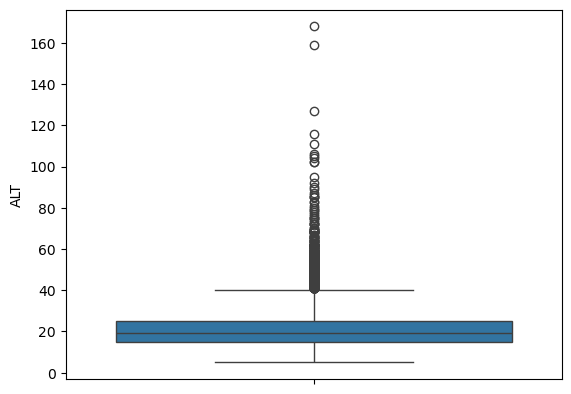

In [6]:
sns.boxplot(df['ALT'])

In [7]:
df.corrwith(df['smoking']).sort_values()

HDL                   -0.301381
age                   -0.205824
Cholesterol           -0.051211
LDL                   -0.046072
hearing(right)        -0.012635
hearing(left)         -0.002729
Urine protein         -0.002361
AST                    0.093435
fasting blood sugar    0.098500
systolic               0.111418
dental caries          0.140560
eyesight(left)         0.143250
eyesight(right)        0.145310
relaxation             0.145720
ALT                    0.216079
waist(cm)              0.303885
triglyceride           0.330554
Gtp                    0.341046
serum creatinine       0.370038
weight(kg)             0.403976
height(cm)             0.510256
hemoglobin             0.525303
smoking                1.000000
dtype: float64

In [8]:
# for x in df.columns:
#   sns.lmplot(x=x, y='smoking', data=df, logistic=True)

In [9]:
print(df[df["dental caries"] == 1]["smoking"].count())
print(df[df["dental caries"] == 1]["smoking"].sum())

1530
1018.0


In [10]:
contingency_table = pd.crosstab(df["dental caries"], df["smoking"])

In [11]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p_value:.4f}")

Chi-Square Statistic: 196.79, p-value: 0.0000


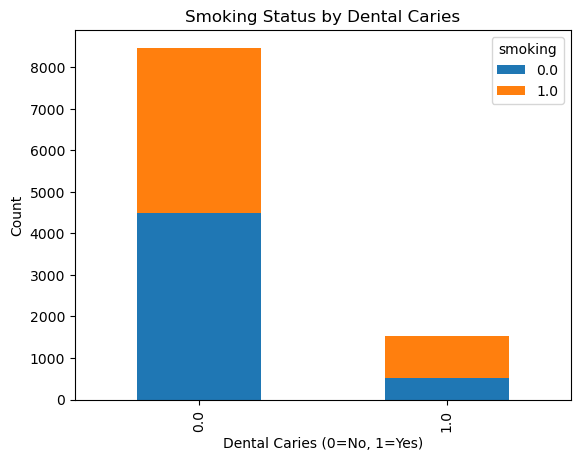

In [12]:
contingency_table.plot(kind="bar", stacked=True)
plt.title("Smoking Status by Dental Caries")
plt.xlabel("Dental Caries (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

In [13]:
pd.crosstab(df["dental caries"], df["smoking"], normalize="index") * 100

smoking,0.0,1.0
dental caries,,
0.0,52.987013,47.012987
1.0,33.464052,66.535948


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

predictors = df.drop(columns=['smoking'], errors='ignore')

# X = sm.add_constant(predictors)

def get_vif_values(X):
  return pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

print(get_vif_values(sm.add_constant(predictors)))

const                  1694.684420
age                       1.832595
height(cm)                3.117182
weight(kg)                6.935448
waist(cm)                 4.646593
eyesight(left)            1.910774
eyesight(right)           1.892860
hearing(left)             1.268353
hearing(right)            1.275595
systolic                  2.507748
relaxation                2.484554
fasting blood sugar       1.176571
Cholesterol             255.961461
triglyceride             59.864728
HDL                      80.175788
LDL                     214.087271
hemoglobin                2.097838
Urine protein             1.006613
serum creatinine          1.563807
AST                       2.255241
ALT                       2.881299
Gtp                       1.588159
dental caries             1.029562
dtype: float64


In [15]:
print(get_vif_values(sm.add_constant(drop(df, ['Cholesterol', 'triglyceride', 'HDL', 'LDL']))))

const                  1585.009935
age                       1.789428
height(cm)                3.220584
weight(kg)                6.899719
waist(cm)                 4.577174
eyesight(left)            1.910925
eyesight(right)           1.892254
hearing(left)             1.267119
hearing(right)            1.274683
systolic                  2.506015
relaxation                2.474071
fasting blood sugar       1.161422
hemoglobin                2.193279
Urine protein             1.006286
serum creatinine          1.558211
AST                       2.218134
ALT                       2.810570
Gtp                       1.548531
dental caries             1.035021
smoking                   1.591832
dtype: float64


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=['smoking'])
y = df['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.779


/home/houssemeddine/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7935

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.70      0.77       991
         1.0       0.75      0.89      0.81      1009

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000


Confusion Matrix:
 [[692 299]
 [114 895]]


AUC Score: 0.868


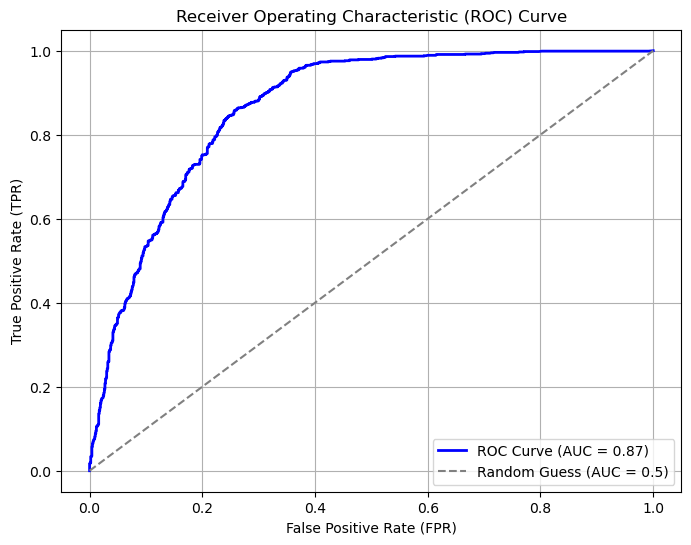

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (smoking=1)
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Print AUC
print(f"AUC Score: {auc_score:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

XGBoost AUC: 0.8737


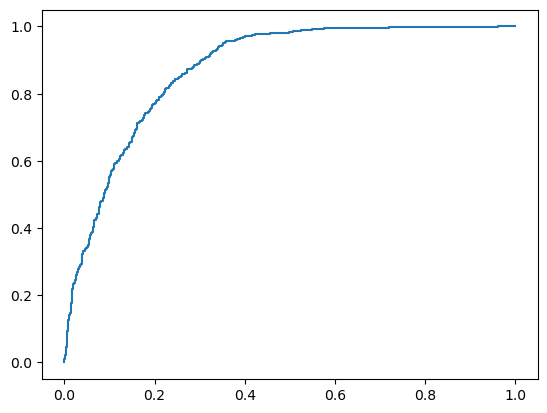

In [19]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve

# Train XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict probabilities
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_probs_xgb)
print(f"XGBoost AUC: {auc_xgb:.4f}")

# Plot ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3991, number of negative: 4009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498875 -> initscore=-0.004500
[LightGBM] [Info] Start training from score -0.004500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

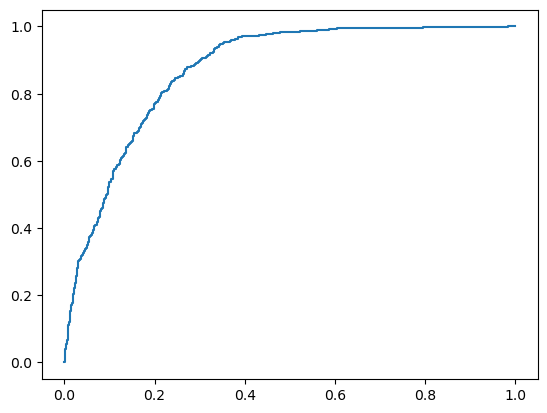

In [20]:
import lightgbm as lgb

# Train LightGBM
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Predict probabilities
y_probs_lgb = lgb_model.predict_proba(X_test)[:, 1]
auc_lgb = roc_auc_score(y_test, y_probs_lgb)
print(f"LightGBM AUC: {auc_lgb:.4f}")

# Plot ROC
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_probs_lgb)
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {auc_lgb:.2f})')

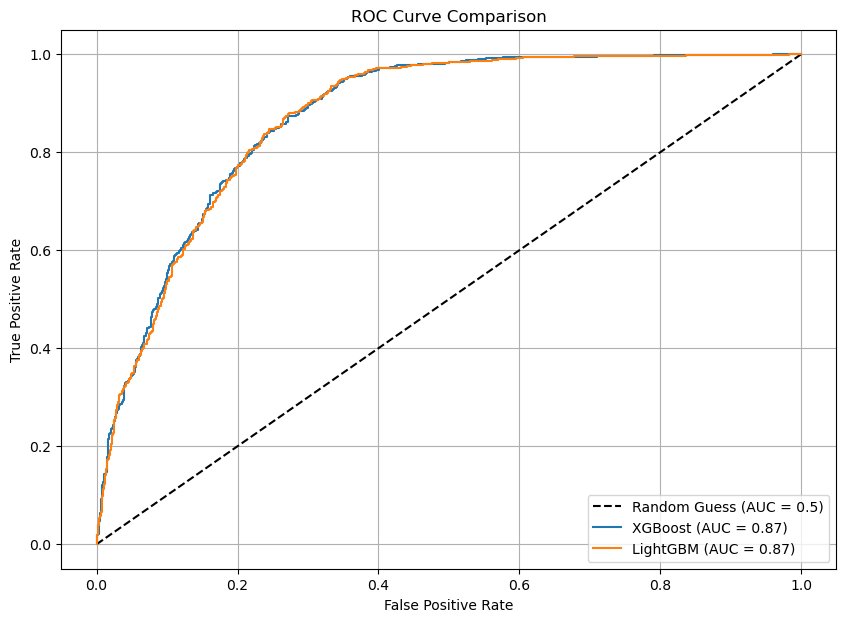

In [21]:
# Plot all curves
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {auc_lgb:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Find optimal threshold for XGBoost (Youden's J)
optimal_idx = np.argmax(tpr_xgb - fpr_xgb)
# optimal_threshold = thresholds_xgb[optimal_idx]
# print(f"Optimal Threshold (XGBoost): {optimal_threshold:.3f}")

In [22]:
from sklearn.model_selection import GridSearchCV

# XGBoost tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 0.9]
}
grid = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print("Best XGBoost Params:", grid.best_params_)

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}


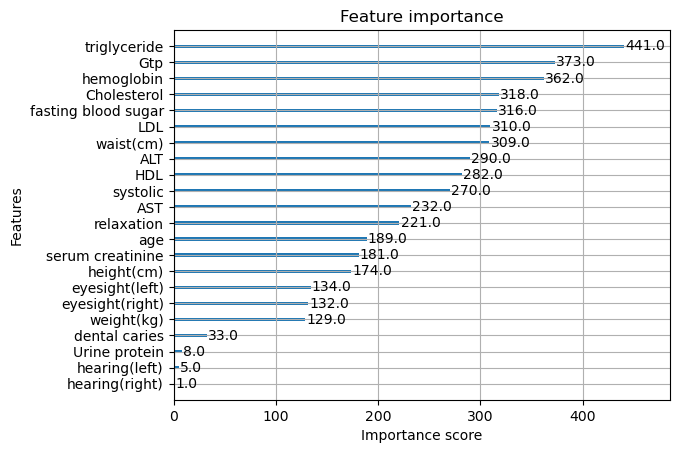

In [23]:
xgb.plot_importance(xgb_model)
plt.show()

In [24]:
from xgboost import XGBClassifier

df = drop(df, ['Urine protein', 'hearing(left)', 'dental caries'])

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7945


In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Critical for SVM
    ('svm', SVC(
        kernel='rbf',              # Non-linear relationships
        C=1.0,                    # Regularization
        probability=True           # Enable predict_proba for ROC
    ))
])

# Train
svm_pipeline.fit(X_train, y_train)

# Evaluate
y_pred_svm = svm_pipeline.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# ROC Curve
y_probs_svm = svm_pipeline.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
auc_svm = roc_auc_score(y_test, y_probs_svm)

SVM Accuracy: 0.8
              precision    recall  f1-score   support

         0.0       0.88      0.69      0.77       991
         1.0       0.75      0.90      0.82      1009

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000



In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Pipeline: Scale data → KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Essential for KNN
    ('knn', KNeighborsClassifier(
        n_neighbors=5,            # Start with 5, tune later
        weights='distance',       # Weight by inverse distance
        metric='euclidean'        # Default distance metric
    ))
])

# Train
knn_pipeline.fit(X_train, y_train)

# Evaluate
y_pred_knn = knn_pipeline.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# ROC Curve
y_probs_knn = knn_pipeline.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
auc_knn = roc_auc_score(y_test, y_probs_knn)

KNN Accuracy: 0.765
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75       991
         1.0       0.75      0.80      0.78      1009

    accuracy                           0.77      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.77      0.76      2000



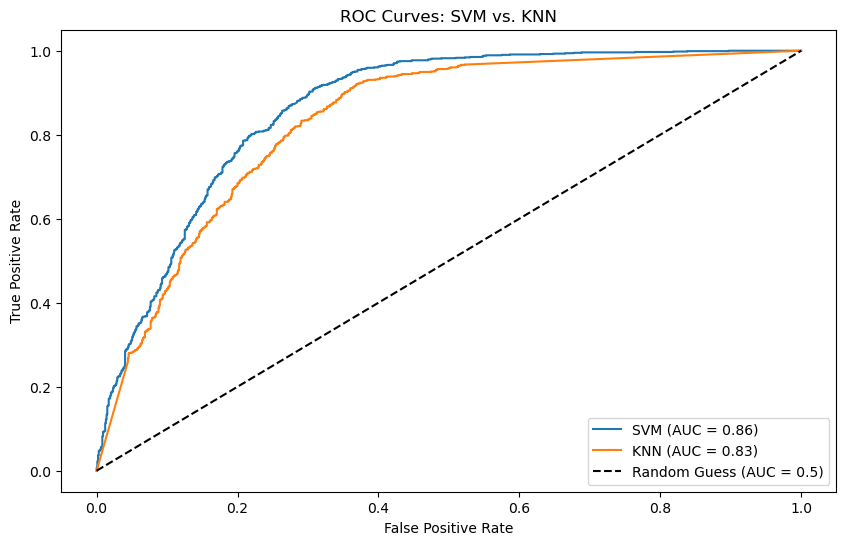

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: SVM vs. KNN')
plt.legend()
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# ROC Curve
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_probs_nb)
auc_nb = roc_auc_score(y_test, y_probs_nb)

Naive Bayes Accuracy: 0.7605
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75       991
         1.0       0.74      0.81      0.77      1009

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline: Scale data → Neural Network
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Critical for NN convergence
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(64, 32),  # 2 hidden layers
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    ))
])

# Train
mlp_pipeline.fit(X_train, y_train)

# Evaluate
y_pred_mlp = mlp_pipeline.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

# ROC Curve
y_probs_mlp = mlp_pipeline.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_probs_mlp)
auc_mlp = roc_auc_score(y_test, y_probs_mlp)

Neural Network Accuracy: 0.745
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       991
         1.0       0.73      0.79      0.76      1009

    accuracy                           0.74      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.75      0.74      0.74      2000



/home/houssemeddine/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


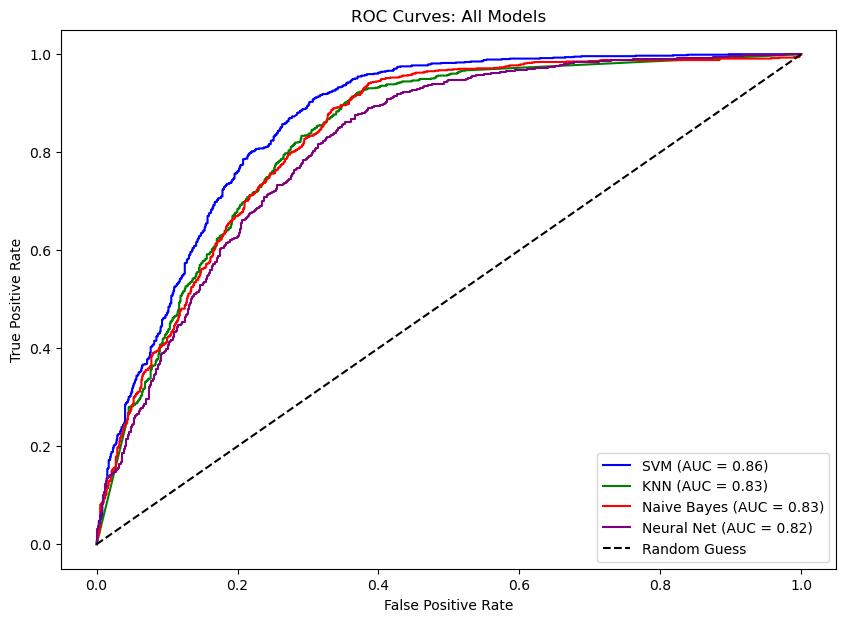

In [30]:
plt.figure(figsize=(10, 7))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='blue')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='green')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='red')
plt.plot(fpr_mlp, tpr_mlp, label=f'Neural Net (AUC = {auc_mlp:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: All Models')
plt.legend()
plt.show()

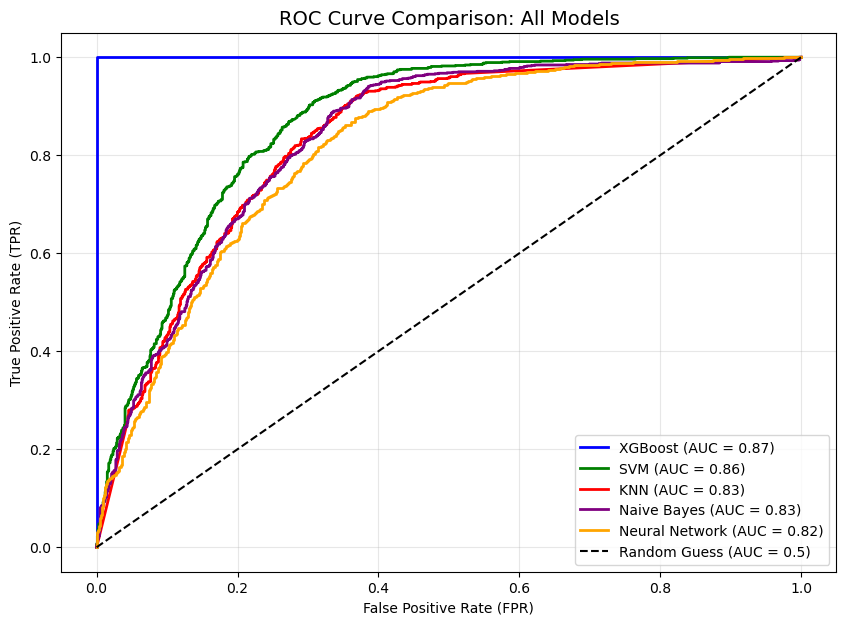

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', early_stopping=True)

models = {
    "XGBoost": (y_test, auc_xgb),
    "SVM": (y_probs_svm, auc_svm),
    "KNN": (y_probs_knn, auc_knn),
    "Naive Bayes": (y_probs_nb, auc_nb),
    "Neural Network": (y_probs_mlp, auc_mlp)
}

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Plot ROC for each model
for (name, (y_probs, auc)), color in zip(models.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})', color=color, lw=2)

# Diagonal line (random guess)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison: All Models', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
test_df = pd.read_csv("test.csv")
ids = test_df['id']

# t = test_df.drop(['id'])
test = test_df.drop(['id'], axis=1)
probs = xgb.predict_proba(test)[:, 1]

output = pd.DataFrame({
  'id': ids,
  'smoking': probs
})

output.to_csv("smoking_prediction.csv", index=False)


Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')
Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(right)', 'systolic', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
       'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'smoking'],
      dtype='object')
